In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import neural_network
from sklearn import ensemble
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

def z_score(data_frame):
    return (data_frame-data_frame.mean())/data_frame.std()

def min_max (data_frame):
    return (data_frame-data_frame.min())/(data_frame.max()-data_frame.min())

def mapa_correlacao (data_frame):
    correlations = data_frame.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();

In [2]:
df = pd.read_csv("C:/Users/14.01587-0/Desktop/Maua/Intelig-ncia-Artificial/precos_casa_california.csv")
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.25,37.85,52.0,919.0,,413.0,,4.0368,269700.0,NEAR BAY
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
3,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
4,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
5,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY
6,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,NaN,281500.0,NEAR BAY
7,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
8,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
9,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY


In [3]:

df_sem_na = df.replace(r'^\s+$', np.NaN, regex=True) #substitui espaços em branco
df_sem_na = df_sem_na.dropna(axis="rows") #limpa tuplas com NaN


df_sem_na.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
3,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
4,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
5,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY
7,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
8,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
9,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY
10,-122.26,37.85,52.0,2643.0,626.0,1212.0,620.0,1.9167,159200.0,NEAR BAY
11,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY


In [39]:
ocean_prox = df_sem_na['ocean_proximity']
one_hot = pd.get_dummies(ocean_prox)
df_one_hot = pd.concat([df_sem_na,one_hot],axis=1) #junta o df com o one-hotting
df_one_hot = df_one_hot.drop('ocean_proximity',axis='columns')

df_one_hot = df_one_hot.apply(pd.to_numeric,errors='coerce') #converte pra numerico

df_one_hot.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
2,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0
3,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0,0,0,1,0
4,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,0,1,0
5,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0,0,0,1,0
7,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,0,0,0,1,0
8,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,0,0,0,1,0
9,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,0,0,0,1,0
10,-122.26,37.85,52.0,2643.0,626.0,1212.0,620.0,1.9167,159200.0,0,0,0,1,0
11,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,0,0,0,1,0


In [40]:
cols = df_one_hot.columns

df_norm = df_one_hot

df_norm = df_one_hot.apply(zscore) 
#df_norm = min_max(df_one_hot)

df_norm.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.323531,1.050851,0.908407,-0.803210,-0.969076,-0.971973,-0.975463,2.337607,0.374262,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
2,-1.333522,1.032064,1.717763,-0.048689,-0.117202,-0.292035,0.036654,-0.114545,0.135910,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
3,-1.333522,1.032064,1.717763,0.210720,0.351329,-0.236548,0.383591,-0.397856,0.046101,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
4,-1.338518,1.032064,0.981985,-0.039571,0.299270,-0.193391,0.247946,-0.944192,0.023261,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
5,-1.333522,1.032064,1.717763,0.413597,0.398655,0.110467,0.558363,-0.097676,0.076711,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
7,-1.338518,1.036760,1.717763,0.392626,0.505140,0.069072,0.610534,-0.318764,0.046723,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
8,-1.338518,1.036760,1.717763,-0.068749,-0.152696,-0.288512,-0.083339,-0.421505,0.002751,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
9,-1.338518,1.032064,1.717763,-0.887096,-0.822364,-0.951716,-0.850252,-0.632450,-0.031744,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
10,-1.338518,1.036760,1.717763,0.000548,0.206984,-0.188107,0.313160,-1.030220,-0.081620,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
11,-1.338518,1.036760,1.570607,-0.693793,-0.604663,-0.641693,-0.615483,-0.920753,-0.111453,-0.892994,-0.685723,-0.015729,2.831264,-0.378584


In [46]:


outliers = [945,20444] #indices dos outliers

df_limpo = df_norm
df_limpo = df_limpo.drop(outliers)
#df_limpo = df_limpo[(np.abs(zscore(df_limpo)) < 2).all(axis=1)]
df_final = df_limpo


df_final.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.323531,1.050851,0.908407,-0.803210,-0.969076,-0.971973,-0.975463,2.337607,0.374262,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
2,-1.333522,1.032064,1.717763,-0.048689,-0.117202,-0.292035,0.036654,-0.114545,0.135910,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
3,-1.333522,1.032064,1.717763,0.210720,0.351329,-0.236548,0.383591,-0.397856,0.046101,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
4,-1.338518,1.032064,0.981985,-0.039571,0.299270,-0.193391,0.247946,-0.944192,0.023261,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
5,-1.333522,1.032064,1.717763,0.413597,0.398655,0.110467,0.558363,-0.097676,0.076711,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
7,-1.338518,1.036760,1.717763,0.392626,0.505140,0.069072,0.610534,-0.318764,0.046723,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
8,-1.338518,1.036760,1.717763,-0.068749,-0.152696,-0.288512,-0.083339,-0.421505,0.002751,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
9,-1.338518,1.032064,1.717763,-0.887096,-0.822364,-0.951716,-0.850252,-0.632450,-0.031744,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
10,-1.338518,1.036760,1.717763,0.000548,0.206984,-0.188107,0.313160,-1.030220,-0.081620,-0.892994,-0.685723,-0.015729,2.831264,-0.378584
11,-1.338518,1.036760,1.570607,-0.693793,-0.604663,-0.641693,-0.615483,-0.920753,-0.111453,-0.892994,-0.685723,-0.015729,2.831264,-0.378584


In [42]:
features = df_final.drop("median_house_value",1)
target = df_final["median_house_value"]
dados_treino_feat,dados_valid_feat,dados_treino_targ,dados_valid_targ = sklearn.model_selection.train_test_split(features,target,test_size=0.3)
#features, target

dados_valid_feat.head(10), dados_valid_targ.head(10)

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 17248  -0.444304 -0.466234            0.172628    -0.548815       -0.517109   
 17361  -1.153680  0.797221           -0.636728    -0.700175       -0.105370   
 2289   -0.094612  0.543590           -0.342417     0.504322        0.547733   
 17481  -1.148685  0.759646           -1.151773    -0.440310       -0.159795   
 5234    0.544826 -0.738652            0.540517     0.130937       -0.408259   
 11572   0.774624 -0.837286           -0.710306    -0.386058       -0.498179   
 4016    0.514852 -0.691684            0.540517    -0.234698       -0.571534   
 1837   -1.353505  1.064942            1.276296    -0.253846       -0.455585   
 5320    0.574800 -0.752743            1.717763    -0.391985       -0.545505   
 16387  -0.848948  1.027367            0.246206    -0.887096       -0.917017   
 
        population  households  median_income  <1H OCEAN    INLAND    ISLAND  \
 17248   -0.536883   -0.599832      -0

In [43]:
#clf = linear_model.Ridge(alpha=0.0000001)
#clf = linear_model.Lasso(alpha=5)  
#clf = neural_network.MLPRegressor(hidden_layer_sizes=(11,11,11),max_iter=200,verbose = True,batch_size=32)
clf = ensemble.BaggingRegressor(n_estimators=20)
#clf = ensemble.AdaBoostRegressor(n_estimators=50)
clf = clf.fit(dados_treino_feat,dados_treino_targ)

precisao_treino = clf.score(dados_treino_feat,dados_treino_targ)
precisao_valid = clf.score(dados_valid_feat,dados_valid_targ)

precisao_treino, precisao_valid

(0.9698501678810018, 0.8126643201429423)

In [44]:
# dados_treino_feat,dados_valid_feat,dados_treino_targ,dados_valid_targ
dados_treino_feat.head(10),dados_treino_targ.head(10)

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 4865    0.659725 -0.762137            0.761251    -0.886184       -0.725345   
 3960    0.479883 -0.682290            0.466940    -0.322687       -0.547871   
 3934    0.474888 -0.672896            0.172628     0.597326        0.256676   
 17413  -1.173663  0.783130            0.025472    -0.576626       -0.256814   
 15702  -1.413452  0.994489            1.717763    -0.016776        0.330032   
 2534   -2.292679  2.422334            1.717763    -0.903053       -0.526574   
 10992   0.859549 -0.874861           -0.563151     0.032462        0.455447   
 1482   -1.218623  1.088426           -0.268839    -0.012217       -0.403526   
 17951  -1.213628  0.787827            0.246206     0.212544        0.176222   
 6935    0.754642 -0.771530            0.614095     0.152364        0.230647   
 
        population  households  median_income  <1H OCEAN    INLAND    ISLAND  \
 4865    -0.334311   -0.709391      -0

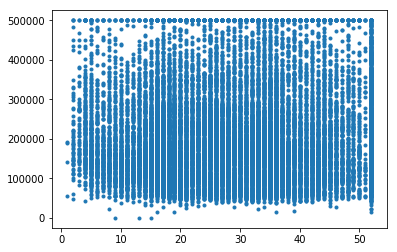

In [47]:
plt.figure()

#df_vis = pd.concat([df_sem_na['ocean_proximity'],df_one_hot['median_house_value']],axis=1)
df_vis = pd.concat([df_sem_na.drop('ocean_proximity',1).apply(pd.to_numeric,errors='coerce'),df_sem_na['ocean_proximity']],1)
df_vis.drop(outliers,inplace=True)


plt.scatter(df_vis['housing_median_age'],df_vis['median_house_value'],marker='.')


In [12]:
df_final.loc[df_final['households'].argmax()]

C:\Users\14.01587-0\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


longitude               -121.7900
latitude                  36.6400
housing_median_age        11.0000
total_rooms            32627.0000
total_bedrooms          6445.0000
population             28566.0000
households              6082.0000
median_income              2.3087
median_house_value    118800.0000
<1H OCEAN                  1.0000
INLAND                     0.0000
ISLAND                     0.0000
NEAR BAY                   0.0000
NEAR OCEAN                 0.0000
Name: 9814, dtype: float64

In [65]:
clf

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [20]:
df_vis.to_csv()
df_vis.to_csv('C:/Users/14.01587-0/Desktop/Maua/Intelig-ncia-Artificial/precos_california_vis.csv',sep=';',decimal=',')

In [37]:
df_norm.loc[825]

longitude            -1.248597
latitude              0.924036
housing_median_age   -0.195261
total_rooms          -0.173607
total_bedrooms       -0.226052
population           -0.340476
households           -0.273763
median_income        -0.044125
median_house_value   -0.012166
<1H OCEAN            -0.892994
INLAND               -0.685723
ISLAND               -0.015729
NEAR BAY              2.831264
NEAR OCEAN           -0.378584
Name: 825, dtype: float64